# Creating a Barplot With seaborn

In [ ]:
! python -m pip install seaborn

In [ ]:
# import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")

(
    sns.barplot(
        data=tips, x="day", y="tip", estimator="mean", errorbar=None
    )
    .set(title="Daily Tips ($)")
);

# plt.show()

In [ ]:
tips["day"]

# Creating a Barplot With Matplotlib

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

tips = pd.read_csv("tips.csv")

average_daily_tip = tips.groupby(["day"])["tip"].mean()

days = ["Thur", "Fri", "Sat", "Sun"]
daily_averages = [
    average_daily_tip["Thur"],
    average_daily_tip["Fri"],
    average_daily_tip["Sat"],
    average_daily_tip["Sun"],
]

fig, ax = plt.subplots()
plt.bar(x=days, height=daily_averages)
ax.set_xlabel("day")
ax.set_ylabel("tip")
ax.set_title("Daily Tips ($)")

plt.show()

In [ ]:
# import matplotlib.pyplot as plt
import seaborn as sns

tips = sns.load_dataset("tips")

(
    sns.barplot(data=tips, x="day", y="tip", estimator="mean", errorbar=None)
    .set_title("Daily Tips ($)")
    .figure.savefig("output.png")
);

# plt.show()

# Using Axes Level Functions


In [9]:
import pandas as pd

crossings = pd.read_csv("cycle_crossings_apr_jun.csv")

In [ ]:
# import matplotlib.pyplot as plt
import seaborn as sns

(
    sns.scatterplot(data=crossings, x="min_temp", y="max_temp")
    .set(
        title="Minimum vs Maximum Temperature",
        xlabel="Minimum Temperature",
        ylabel="Maximum Temperature",
    )
);

In [ ]:
(
    sns.scatterplot(
        data=crossings,
        x="min_temp",
        y="max_temp",
        hue="month",
        size="month",
        style="month",
    ).set(
        title="Minimum vs Maximum Temperature",
        xlabel="Minimum Temperature",
        ylabel="Maximum Temperature",
    )
)

plt.legend(title="Month")
plt.show()

# Using Figure Level Functions

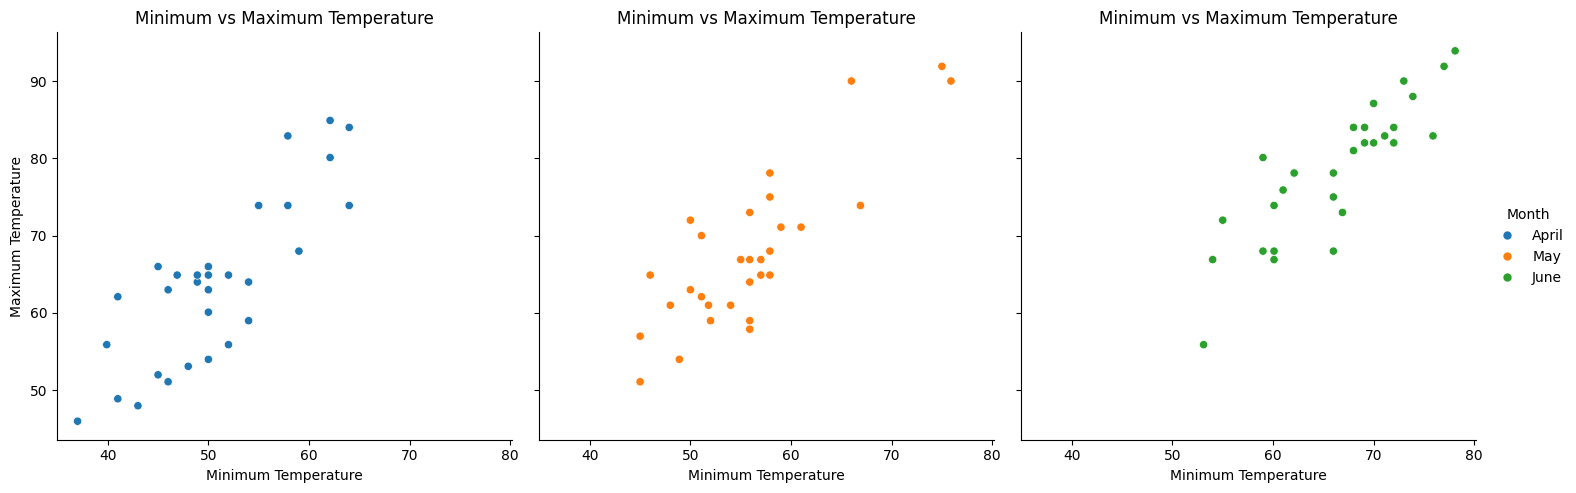

In [25]:
# import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

crossings = pd.read_csv("cycle_crossings_apr_jun.csv")

(
    sns.relplot(
        data=crossings,
        x="min_temp",
        y="max_temp",
        kind="scatter",
        hue="month",
        col="month",
    )
    .set(
        title="Minimum vs Maximum Temperature",
        xlabel="Minimum Temperature",
        ylabel="Maximum Temperature",
    )
    .legend.set_title("Month")
);

# Introducing seaborn’s Contemporary Objects Interface

In [ ]:
import seaborn.objects as so
import pandas as pd

crossings = pd.read_csv("cycle_crossings_apr_jun.csv")

(so.Plot(data=crossings, x="min_temp", y="max_temp").show())

In [ ]:
(
    so.Plot(data=crossings, x="min_temp", y="max_temp")
    .add(so.Dot())
    .label(
        title="Minimum vs Maximum Temperature",
        x="Minimum Temperature",
        y="Maximum Temperature",
    )
    .show()
)

In [ ]:
(
    so.Plot(data=crossings, x="min_temp", y="max_temp", color="month")
    .add(so.Dot(), marker="month")
    .label(
        title="Minimum vs Maximum Temperature",
        x="Minimum Temperature",
        y="Maximum Temperature",
        color=str.capitalize,
    )
    .show()
)

In [ ]:
(
    so.Plot(data=crossings, x="min_temp", y="max_temp", color="month")
    .add(so.Dot(), marker="month")
    .facet(col="month")
    .layout(size=(15, 5))
    .label(
        title="Minimum vs Maximum Temperature",
        x="Minimum Temperature",
        y="Maximum Temperature",
        color=str.capitalize,
    )
    .show()
)

# Creating Categorical Plots Using Functions

In [ ]:
import pandas as pd

crossings = pd.read_csv("cycle_crossings_apr_jun.csv")
crossings.head()

In [ ]:
bridge_crossings = crossings.melt(
    id_vars=["day", "date"],
    value_vars=["Brooklyn", "Manhattan", "Williamsburg", "Queensboro"],
    var_name="Bridges",
    value_name="Crossings",
).rename(columns={"day": "Day", "date": "Date"})

bridge_crossings.head()

In [ ]:
import matplotlib.pyplot as plt

import seaborn as sns

sns.barplot(
    data=bridge_crossings,
    x="Day",
    y="Crossings",
    hue="Bridges",
    errorbar=None,
    estimator="sum",
)

plt.show()

In [ ]:
wednesday_crossings = crossings.loc[crossings.day.isin(["Wednesday"])].rename(
    columns={"month": "Month"}
)

(
    sns.boxplot(
        data=wednesday_crossings, x="day", y="Williamsburg", hue="Month"
    ).set(xlabel=None)
)

plt.show()

## Exercise Solutions

**Task 1**: See if you can create multiple barplots for the weekend data only, with each day on a separate plot but in the same row. Each subplot should show the highest number of crossings for each bridge.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

crossings = pd.read_csv("cycle_crossings_apr_jun.csv")

bridge_crossings = crossings.melt(
    id_vars=["day", "date"],
    value_vars=["Brooklyn", "Manhattan", "Williamsburg", "Queensboro"],
    var_name="Bridges",
    value_name="Crossings",
).rename(columns={"day": "Day", "date": "Date"})

weekend = bridge_crossings.loc[
    bridge_crossings.Day.isin(["Saturday", "Sunday"])
]

(
    sns.catplot(
        data=weekend,
        x="Day",
        y="Crossings",
        hue="Bridges",
        col="Day",
        errorbar=None,
        estimator="max",
        kind="bar",
    ).set(xlabel=None)
)

plt.show()

**Task 2**: See if you can draw three boxplots in a row containing separate monthly crossings for the Brooklyn Bridge for Wednesdays only.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

crossings = pd.read_csv("cycle_crossings_apr_jun.csv")

wednesday = crossings.loc[crossings.day.isin(values=["Wednesday"])].rename(
    columns={"month": "Month"}
)

(
    sns.catplot(
        data=wednesday, x="day", y="Brooklyn", col="Month", kind="box"
    ).set(xlabel=None)
)

plt.show()

# Creating Distribution Plots Using Functions

In [ ]:
import pandas as pd

cereals_data = pd.read_csv("cereals_data.csv").rename(
    columns={"rating": "Rating"}
)

cereals_data.head()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

(
    sns.histplot(data=cereals_data, x="Rating", bins=10).set(
        title="Cereal Ratings Distribution"
    )
)

plt.show()

In [ ]:
(
    sns.kdeplot(data=cereals_data, x="Rating").set(
        title="Cereal Ratings KDE Curve"
    )
)

plt.show()

In [ ]:
sns.kdeplot(data=cereals_data, x="Rating")

(
    sns.rugplot(data=cereals_data, x="Rating", height=0.2, color="black").set(
        title="Cereal Rating Distribution"
    )
)

plt.show()

## Exercise Solutions

**Task 1:** Produce a single histogram showing cereal ratings distribution such that there is a separate bar for each manufacturer. Keep to the same 10 bins.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

cereals_data = pd.read_csv("cereals_data.csv").rename(
    columns={"rating": "Rating"}
)

sns.histplot(
    data=cereals_data,
    x="Rating",
    bins=10,
    hue="manufacturer",
    multiple="dodge",
)

plt.show()

**Task 2:** See if you can superimpose a KDE plot onto your original ratings histogram using only one functions.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

cereals_data = pd.read_csv("cereals_data.csv").rename(
    columns={"rating": "Rating"}
)

sns.histplot(data=cereals_data, x="Rating", kde=True, bins=10)
plt.show()

**Task 3**: Update your answer to task 1 such that each manufacturer's rating distribution appears on a separate plot and each has its own KDE curve.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

cereals_data = pd.read_csv("cereals_data.csv").rename(
    columns={"rating": "Rating", "manufacturer": "Manufacturer"}
)

sns.displot(
    data=cereals_data,
    x="Rating",
    bins=10,
    hue="Manufacturer",
    kde=True,
    col="Manufacturer",
)

plt.show()

# Creating Relational Plots Using Functions

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

crossings = pd.read_csv("cycle_crossings_apr_jun.csv")

sns.set_theme(style="darkgrid")

(
    sns.lineplot(data=crossings, x="date", y="Brooklyn").set(
        title="Brooklyn Bridge Daily Crossings", xlabel=None
    )
)

plt.xticks(
    ticks=["01/04/2017", "01/05/2017", "01/06/2017", "30/06/2017"], rotation=45
)

plt.show()

## Exercise Solutions

**Task 1**  Using an appropriate dataframe, produce a single line plot showing the crossings for all bridges from April to June.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

crossings = pd.read_csv("cycle_crossings_apr_jun.csv")

bridge_crossings = crossings.melt(
    id_vars=["day", "date"],
    value_vars=["Brooklyn", "Manhattan", "Williamsburg", "Queensboro"],
    var_name="Bridges",
    value_name="Crossings",
).rename(columns={"day": "Day", "date": "Date"})

(
    sns.lineplot(
        data=bridge_crossings,
        x="Date",
        y="Crossings",
        hue="Bridges",
        style="Bridges",
    ).set_title("Daily Bridge Crossings")
)

plt.xticks(
    ticks=["01/04/2017", "01/05/2017", "01/06/2017", "30/06/2017"], rotation=45
)

plt.show()

**Task 2** Clarify your solution to exercise 1 by creating a separate subplot for each bridge.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

crossings = pd.read_csv("cycle_crossings_apr_jun.csv")

bridge_crossings = crossings.melt(
    id_vars=["day", "date"],
    value_vars=["Brooklyn", "Manhattan", "Williamsburg", "Queensboro"],
    var_name="Bridges",
    value_name="Crossings",
).rename(columns={"day": "Day", "date": "Date"})

sns.relplot(
    data=bridge_crossings,
    kind="line",
    x="Date",
    y="Crossings",
    hue="Bridges",
    col="Bridges",
)

plt.xticks(
    ticks=["01/04/2017", "01/05/2017", "01/06/2017", "30/06/2017"], rotation=45
)

plt.show()

# Creating Regression Plots Using Functions

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

crossings = pd.read_csv("cycle_crossings_apr_jun.csv")

(
    sns.regplot(data=crossings, x="min_temp", y="max_temp", ci=95).set(
        title="Regression Analysis of Temperatures",
        xlabel="Minimum Temperature",
        ylabel="Maximum Temperature",
    )
)

plt.show()

In [ ]:
! python -m pip install scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression

x = crossings.loc[:, ["min_temp"]]
y = crossings.loc[:, "max_temp"]

model = LinearRegression()
model.fit(x, y)

r_squared = f"R-Squared: {model.score(x, y):.2f}"
best_fit = f"y = {model.coef_[0]:.4f}" + f"x{model.intercept_:+.4f}"

ax = sns.regplot(
    data=crossings,
    x="min_temp",
    y="max_temp",
    line_kws={"label": best_fit + "\n" + r_squared},
)

ax.set_xlabel("Minimum Temperature")
ax.set_title("Regression Analysis of Temperatures")
ax.set_ylabel("Maximum Temperature")
ax.legend()

plt.show()

## Exercise Solutions

**Task 1**: Redo the previous regression plot, but this time create a single plot showing a separate regression line, with equation, for each of the three months.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

import seaborn as sns


def calculate_regression(month, data):
    x = data.loc[:, ["min_temp"]]
    y = data.loc[:, "max_temp"]
    model = LinearRegression()
    model.fit(x, y)
    r_squared = f"R-Squared: {model.score(x, y):.2f}"
    best_fit = (
        f"{month}\ny = {model.coef_[0]:.4f}" + f"x{model.intercept_:+.4f}"
    )
    return r_squared, best_fit


def drawplot(month, crossings):
    monthly_crossings = crossings[crossings.month == month]
    r_squared, best_fit = calculate_regression(month, monthly_crossings)

    ax = sns.regplot(
        data=monthly_crossings,
        x="min_temp",
        y="max_temp",
        ci=None,
        line_kws={"label": best_fit + "\n" + r_squared},
    )
    ax.set_title("Regression Analysis of Temperatures")
    ax.legend()


crossings = pd.read_csv("cycle_crossings_apr_jun.csv")

months = ["April", "May", "June"]
for month in months:
    drawplot(month, crossings)

plt.show()

**Task 2**: Use an appropriate figure level function to create a separate regression plot for each month. 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

crossings = pd.read_csv("cycle_crossings_apr_jun.csv")

sns.lmplot(data=crossings, x="min_temp", y="max_temp", col="month")

plt.show()

**Task 3**: See if you can add the correct equation onto each of the three plots you created in task 2.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

import seaborn as sns

crossings = pd.read_csv("cycle_crossings_apr_jun.csv")


def regression_equation(data, **kws):
    x = data.loc[:, ["min_temp"]]
    y = data.loc[:, "max_temp"]
    model = LinearRegression()
    model.fit(x, y)
    r_squared = f"R-Squared: {model.score(x, y):.2f}"
    best_fit = f"y = {model.coef_[0]:.4f}x" + f"{model.intercept_:+.4f}"
    ax = plt.gca()  # Get current Axes.
    ax.text(
        0.1,
        0.6,
        f"{best_fit}{chr(10)}" + f"{r_squared}",
        transform=ax.transAxes,
    )


crossings = pd.read_csv("cycle_crossings_apr_jun.csv")

sns.lmplot(
    data=crossings, x="min_temp", y="max_temp", col="month"
).map_dataframe(regression_equation)

plt.show()

# Using the Main Data Visualization Objects

In [ ]:
import seaborn.objects as so
import pandas as pd

crossings = pd.read_csv("cycle_crossings_apr_jun.csv")

first_week = crossings.loc[crossings.month == "April"].head(7)

(
    so.Plot(data=first_week, x="day", y="min_temp")
    .add(so.Line(color="black", linewidth=3, marker="o"))
    .add(so.Bar(color="green", fill=False, edgewidth=3))
    .add(so.Area(color="yellow"))
    .label(x="Day", y="Temperature", title="Minimum Temperature")
    .show()
)

# Enhancing Your Plots With “Move” and “Stat” Objects

In [ ]:
import seaborn.objects as so
import pandas as pd

crossings = pd.read_csv("cycle_crossings_apr_jun.csv")

(
    so.Plot(data=crossings, x="month", y="max_temp", color="day")
    .add(so.Bar(), so.Agg(func="median"), so.Dodge(gap=0.1))
    .label(x=None, y="Temperature", title="Median Temperature", color="Day")
    .show()
)

# Separating a Plot Into Subplots

In [ ]:
import seaborn.objects as so
import pandas as pd

crossings = pd.read_csv("cycle_crossings_apr_jun.csv")

(
    so.Plot(data=crossings, x="month", y="max_temp", color="day")
    .facet(col="month")
    .add(so.Bar(), so.Agg(func="median"), so.Dodge(gap=0.1))
    .label(x=None, y="Temperature", title="Median Temperature", color="Day")
    .show()
)

## Exercise Solutions

**Task 1:** Using the objects API, redraw the min_temperature vs max_temperature scatterplot you created at the start of the article using objects. Also, make sure each marker has a different color depending on the days it represents.  Finally, each marker should be represented by a star.)

In [ ]:
import seaborn.objects as so
import pandas as pd

crossings = pd.read_csv("cycle_crossings_apr_jun.csv")

(
    so.Plot(data=crossings, x="min_temp", y="max_temp", color="day")
    .add(so.Dot(marker="*"))
    .label(
        x="Minimum Temperature",
        y="Maximum Temperature",
        title="Scatterplot of Temperatures",
    )
    .show()
)

**Task 2**: Using the objects API, create a barplot showing the maximum and minimum number of bridge crossings for each of the four bridges.

In [ ]:
import seaborn.objects as so
import pandas as pd

crossings = pd.read_csv("cycle_crossings_apr_jun.csv")

bridge_crossings = crossings.melt(
    id_vars=["day", "date"],
    value_vars=["Brooklyn", "Manhattan", "Williamsburg", "Queensboro"],
    var_name="Bridges",
    value_name="Crossings",
)

(
    so.Plot(data=bridge_crossings, x="Bridges", y="Crossings", color="Bridges")
    .add(so.Bar(), so.Agg("max"))
    .add(so.Bar(), so.Agg("min"))
    .label(x="Bridge", y="Crossings", title="Bridge Crossings")
    .show()
)

**Task 3**: Using the objects API, create a barplot analyzing the counts of breakfast cereal calories. The calories should be placed into 10 equal-sized bins.

In [ ]:
import seaborn.objects as so
import pandas as pd

crossings = pd.read_csv("cycle_crossings_apr_jun.csv")

cereals_data = pd.read_csv("cereals_data.csv")

(
    so.Plot(data=cereals_data, x="calories")
    .add(so.Bar(), so.Hist(bins=10))
    .label(x="Calories", y="Count", title="Calorie Counts")
    .show()
)